<a href="https://colab.research.google.com/github/BIMCV-CSUSP/AnonymizationHackaton/blob/main/lab/HackathonDemo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

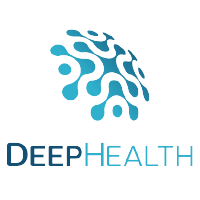

# **MEDICAL DATA ANONYMIZATION HACKATHON**
## Demo 1 - **DisMed**: De-Identification of Medical Texts

In this Demo, we will get some insights about the functionalities of our medical texts anonymizer: **DisMed**.


### **DiSMed - De-identifying Spanish Medical texts**
DiSMed is a de-identification methodology for Spanish medical texts based on Named Entity Recognition (NER). It is based on [spaCy](https://spacy.io/) and partially based on the networks designed by Gillaume Genthial implemented on Tensorflow 1. DiSMed includes both the Python code and the curated dataset, available under request under a research use agreement.

Data access can be requested at [BIMCV](http://bimcv.cipf.es/).

The results obtained are available at [Journal of Biomedical Semantics: De-identifying Spanish medical texts - named entity recognition applied to radiology reports ](https://doi.org/10.1186/s13326-021-00236-2).

### **Hands On!**

#### **Accesing the Python code**
DisMed code is open and available at GitHub ([link](https://github.com/BIMCV-CSUSP/DiSMed)).

The repository can be cloned as follows:

In [ ]:
# Retrieving all the code from GitHub. "!" is needed to use outer commands from Python.
!git clone https://github.com/BIMCV-CSUSP/DiSMed.git

Cloning into 'DiSMed'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 143 (delta 45), reused 79 (delta 19), pack-reused 0
Receiving objects: 100% (143/143), 8.52 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
# With "!ls" we can see all the files in our current working directory.
!ls 

DiSMed	sample_data


#### **Downloading a raw report from Google Drive**
DisMed repository includes its own examples of reports, but all of them are currently annotated. Here we can download one of these example reports ([link](https://drive.google.com/file/d/1zu-wo-IBO1eXnaiD-iNXiSglCkXjpa7f/view?usp=sharing)) in its basic plain text format before annotation. 

In [ ]:
# Downloading a plain text raw report from Google Drive
# and storing it in "rawreports" folder
!mkdir rawreports
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zu-wo-IBO1eXnaiD-iNXiSglCkXjpa7f' -O rawreports/testa_raw.txt

--2021-12-30 09:53:51--  https://docs.google.com/uc?export=download&id=1zu-wo-IBO1eXnaiD-iNXiSglCkXjpa7f
Resolving docs.google.com (docs.google.com)... 172.217.2.110, 2607:f8b0:4004:80a::200e
Connecting to docs.google.com (docs.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/krlhdar9pqmftfq2v39hf2tolu5bc0ia/1640858025000/13404096326156635612/*/1zu-wo-IBO1eXnaiD-iNXiSglCkXjpa7f?e=download [following]
--2021-12-30 09:53:52--  https://doc-00-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/krlhdar9pqmftfq2v39hf2tolu5bc0ia/1640858025000/13404096326156635612/*/1zu-wo-IBO1eXnaiD-iNXiSglCkXjpa7f?e=download
Resolving doc-00-ak-docs.googleusercontent.com (doc-00-ak-docs.googleusercontent.com)... 172.217.1.193, 2607:f8b0:4004:801::2001
Connecting to doc-00-ak-docs.googleusercontent.com (doc-00-ak-docs.googleus

In [ ]:
# Check if the file is correctly downloaded
!ls rawreports/

testa_raw.txt


  We can show the report content using some commands such as *head* or *tail*.

In [ ]:
# Display first 10 lines from the report
!head rawreports/testa_raw.txt

Nombre: VERONICA Apellidos: GALVARRO AZZAROUALI
F.Nacimiento: 22/12/1923 F.Realización: 14/10/2016
Médico solicitante: MATARREDONA DEL GAYOSO , CONCEPCION ,
Centro solicitante: NEUROLOGIA ( C.S. PARE JOFRE ) 
Exploración solicitada: VASC CEREBRAL
E12343212  Número Exploración : AC-12321 

RM Cerebral
RM Vascular Cerebral (Willis-TSA)  



As we can see, this radiology report contains sensible data from both patient and physician. Also, there are information about the health institution and some IDs that can allow to extract personal information from the text. In the next section, we will see how to apply our methodology to de-identify radiology texts.

#### **The DisMed Pipeline**



This Pipeline for radiological texts de-identification is composed for several steps:


1.   **Corpus construction**: In this step, plain texts retrieved from a database have to be manually annotated. This process is extensive in terms of time and effort and requires the annotation of the reports one by one. We can speed up this step by applying a *pre-annotation* based on lists of terms and/or regular expressions.
2.   **Randomization**: A process of randomization can be applied on the annotated texts to increase the variability of the corpus. This process could lead to a more general predictive model.
3.   **Model Training**: Finally we can train different models with the preprocessed corpus and evaluate them to achieve the better possible model.



We can access all the python scripts that compose the pipeline in the folder *scripts* within the repository. All of them perform concrete processing and evaluating functions.

In [ ]:
# Changing working directory with "%cd".
%cd DiSMed/scripts

/content/DiSMed/scripts


In [ ]:
# Check all available python scripts
!ls

evaluate_spacy.py  iobes_to_html.py  spacy_to_html.py
global_metrics.py  pre_annotator.py  synthetic_dataset.py
iobes_tagging.py   README.md	     text_to_json_spacy.py


#### **1. Radiology Reports Pre-annotation**


In this section, we will execute the [*pre_annotator.py*](https://github.com/BIMCV-CSUSP/DiSMed/blob/master/scripts/pre_annotator.py) script to pre-annotate the names, surnames and institutions of the reports. We will use the test A report as an example.

In [ ]:
# Displaying optional arguments
!python pre_annotator.py -h

usage: pre_annotator.py [-h] [-d DIRECTORY] [-v VERBOSE] [-nf NAMES]
                        [-sf SURNAMES] [-o OVERWRITE]

optional arguments:
  -h, --help            show this help message and exit
  -d DIRECTORY, --directory DIRECTORY
                        Directory where the text files are stored
  -v VERBOSE, --verbose VERBOSE
                        Whether to show in screen progress notes or not
  -nf NAMES, --names NAMES
                        Path of the file containing the name database
  -sf SURNAMES, --surnames SURNAMES
                        Path of the file containing the surname database
  -o OVERWRITE, --overwrite OVERWRITE
                        Whether to overwrite input files or not


In [ ]:
# Executing the script
!python pre_annotator.py -d "../../rawreports/" -nf "../data/databases/names.csv" -sf "../data/databases/surnames.csv"

Tagging hospital words

0.01316690444946289
Tagging names
Attribute Error, trying to strip word 'nan'
['JOFRE', 'CONCEPCION', 'VERONICA']
10.04893684387207
Replacing with surname database

[]
9.801239490509033
total time 19.86389660835266


We can explore the tagged report to assess the results from pre-annotation.

In [ ]:
!head ../../rawreports/testa_raw_tagged.txt

Nombre: <NAME>VERONICA</NAME> Apellidos: GALVARRO AZZAROUALI
F.Nacimiento: 22/12/1923 F.Realización: 14/10/2016
Médico solicitante: MATARREDONA DEL GAYOSO , <NAME>CONCEPCION</NAME> ,
Centro solicitante: NEUROLOGIA ( C.S. <INST>PARE</INST> <INST>JOFRE</INST> ) 
Exploración solicitada: VASC CEREBRAL
E12343212  Número Exploración : AC-12321 

RM Cerebral
RM Vascular Cerebral (Willis-TSA)  



As we can see, we have detected only a portion of all entities to be recognized. To ensure the right annotation of every entity we have to manually correct all the reports. The poor execution of this automated method emphasizes the need for more sophisticated ways to detect entities.

In [ ]:
# Displaying manually corrected report
!head ../data/sr/testa.txt

Nombre: <NAME>VERONICA</NAME> Apellidos: <NAME>GALVARRO</NAME> <NAME>AZZAROUALI</NAME>
F.Nacimiento: <FECHA>22/12/1923</FECHA> F.Realización: <FECHA>14/10/2016</FECHA>
Médico solicitante: <NAME>MATARREDONA</NAME> <NAME>DEL</NAME> <NAME>GAYOSO</NAME> , <NAME>CONCEPCION</NAME> ,
Centro solicitante: NEUROLOGIA ( <INST>C.S.</INST> <INST>PARE</INST> <INST>JOFRE</INST> ) 
Exploración solicitada: VASC CEREBRAL
<NUM>E12343212</NUM>  Número Exploración : <NUM>AC-12321</NUM> 

RM Cerebral
RM Vascular Cerebral (Willis-TSA)  



#### **2. Data Randomization**


This step is not necessary to get an effective NER model. However, we empirically concluded that data randomization led us to a more flexible and versatile model. Randomization replaces actual tagged words with equivalent words belonging to the same named entities.
This preprocess step is applied by running the [*synthetic_dataset.py*](https://github.com/BIMCV-CSUSP/DiSMed/blob/master/scripts/synthetic_dataset.py) script.

In [ ]:
# Displaying optional arguments explanation
!python synthetic_dataset.py -h

usage: synthetic_dataset.py [-h] [-df DATAFILE] [-nf NAMES] [-sf SURNAMES]
                            [-af ADDRESSES] [-hf HOSPITALS]
                            [-hcf HEALTHCENTRES] [-cf CITIES] [-of OUTPUT]

optional arguments:
  -h, --help            show this help message and exit
  -df DATAFILE, --datafile DATAFILE
                        Path of the file to alter
  -nf NAMES, --names NAMES
                        Path of the file containing the name database
  -sf SURNAMES, --surnames SURNAMES
                        Path of the file containing the surname database
  -af ADDRESSES, --addresses ADDRESSES
                        Path of the file containing the address database
  -hf HOSPITALS, --hospitals HOSPITALS
                        Path of the file containing the hospital database
  -hcf HEALTHCENTRES, --healthcentres HEALTHCENTRES
                        Path of the file containing the health centres
                        database
  -cf CITIES, --cities CITIES
          

In [ ]:
# Applying randomization to manually annotated test A report.
!python synthetic_dataset.py -df '../data/sr/testa.txt' -of '../data/testa_randomized.txt'

In [ ]:
# Displaying randomized report
!head ../data/testa_randomized.txt

Nombre: <NAME>VICENTE</NAME> Apellidos: <NAME>SANCHEZ</NAME> <NAME>GARRIDO</NAME>
F.Nacimiento: <FECHA>25/9/2007</FECHA> F.Realización: <FECHA>29/8/1995</FECHA>
Médico solicitante: <NAME>RAFAEL</NAME> <NAME>JARAMILLO</NAME> <NAME>VELAZQUEZ</NAME> , <NAME>JOSE</NAME> <NAME>CIPRIANO</NAME> ,
Centro solicitante: NEUROLOGIA ( <INST>HOSPITAL</INST> <INST>SANTIAGO</INST> <INST>APÓSTOL</INST>   )
Exploración solicitada: VASC CEREBRAL
<NUM>Q35734361</NUM> Número Exploración : <NUM>xe-36333</NUM>

RM Cerebral
RM Vascular Cerebral (Willis-TSA)



#### **3. Training a Model**

This step is necessary to get a predictive model from a processed corpus. We have achieved this using the open-source Python library for Natural Language Processing (NLP), [SpaCy](https://spacy.io/). We will train an example model in the following code cells. But first, we have to adapt our reports to a compatible input format.

Plain texts reports must be transformed to JSON files. This could be achieved using the [*text_to_json_spacy.py*](https://github.com/BIMCV-CSUSP/DiSMed/blob/master/scripts/text_to_json_spacy.py) script.

In [ ]:
# Displaying optional arguments explanation
!python text_to_json_spacy.py -h

usage: text_to_json_spacy.py [-h] [-txt TEXTFILE] [-out OUTPUT]
                             [-mn DUMMYMODEL] [-ll LABELLIST]

optional arguments:
  -h, --help            show this help message and exit
  -txt TEXTFILE, --textfile TEXTFILE
                        Path of the file with records to transform
  -out OUTPUT, --output OUTPUT
                        Path to save the json output
  -mn DUMMYMODEL, --dummymodel DUMMYMODEL
                        Directory of the dummy model
  -ll LABELLIST, --labellist LABELLIST
                        NERs to use in the model


To train and evaluate the model, we have to transform both train and test data partitions.

In [ ]:
# JSON transformation of the train set
!python text_to_json_spacy.py -txt '../data/sr/train.txt' -out '../data/sr/srjson_train/train.json'

In [ ]:
# JSON transformation of the test set
!python text_to_json_spacy.py -txt '../data/sr/testa.txt' -out '../data/sr/srjson_test/testa.json'

In [ ]:
!ls ../data/sr/

README.md  srjson_test	srjson_train  testa.txt  testb.txt  train.txt


In [ ]:
!ls ../data/sr/srjson_test/

testa.json


In [ ]:
# Displaying test A report in JSON format
!head -n 40 ../data/sr/srjson_test/testa.json

[
  {
    "id":0,
    "paragraphs":[
      {
        "raw":"Nombre: VERONICA Apellidos: GALVARRO AZZAROUALI",
        "sentences":[
          {
            "tokens":[
              {
                "id":0,
                "orth":"Nombre",
                "head":0,
                "dep":"",
                "ner":"O"
              },
              {
                "id":1,
                "orth":":",
                "head":0,
                "dep":"",
                "ner":"O"
              },
              {
                "id":2,
                "orth":"VERONICA",
                "head":0,
                "dep":"",
                "ner":"U-NAME"
              },
              {
                "id":3,
                "orth":"Apellidos",
                "head":0,
                "dep":"",
                "ner":"O"
              },
              {
                "id":4,
                "orth":":",


Finally, several models can be trained using functionalities implemented in SpaCy. In this case, we will train the model with the *train* function. 

Please note that we are training and evaluating the models with only two reports (one training report and another test report) to shorten the execution time. Therefore, the performance of these models should be poor. Corpus size must be much greater to get a truly functional model.

In [ ]:
# Training the Named Entity Recognition (NER) model
!python -m spacy train en ../data/models/example_model2/ ../data/sr/srjson_train/train.json ../data/sr/srjson_test/testa.json -p "ner"

✔ Created output directory: ../data/models/example_model2
Training pipeline: ['ner']
Starting with blank model 'en'
Counting training words (limit=0)

Itn  NER Loss   NER P   NER R   NER F   Token %  CPU WPS
---  ---------  ------  ------  ------  -------  -------
  1    208.141   0.000   0.000   0.000  100.000    12531
  2    222.624   0.000   0.000   0.000  100.000    12204
  3    152.648   0.000   0.000   0.000  100.000    12588
  4     39.103   0.000   0.000   0.000  100.000    12572
  5     35.838   0.000   0.000   0.000  100.000    13205
  6     32.584   0.000   0.000   0.000  100.000    13372
  7     26.329   0.000   0.000   0.000  100.000    11320
  8     25.215   0.000   0.000   0.000  100.000    11646
  9     22.880   0.000   0.000   0.000  100.000    11787
 10     21.247   0.000   0.000   0.000  100.000    11114
 11     20.635   0.000   0.000   0.000  100.000     8961
 12     21.042   0.000   0.000   0.000  100.000    11540
 13     17.848   0.000   0.000   0.000  100.000    

Some models are trained with the same data, but only one is selected as the best model.

In [ ]:
# List of models generated as a result of the training phase.
!ls ../data/models/example_model2

model0	 model12  model16  model2   model23  model27  model4  model8
model1	 model13  model17  model20  model24  model28  model5  model9
model10  model14  model18  model21  model25  model29  model6  model-best
model11  model15  model19  model22  model26  model3   model7  model-final


#### **4. Evaluating the Model**

Models generated can be evaluated using a wide range of metrics. In this case, metrics are calculated by applying functionalities implemented in *SpaCy*. We will use python [evaluate_spacy.py](https://github.com/BIMCV-CSUSP/DiSMed/blob/master/scripts/evaluate_spacy.py) script to generate them.

In [ ]:
# Displaying optional arguments explanation
!python evaluate_spacy.py -h

usage: evaluate_spacy.py [-h] [-gf GROUNDTRUTH] [-ms MODELSPACY]
                         [-ll LABELLIST]

optional arguments:
  -h, --help            show this help message and exit
  -gf GROUNDTRUTH, --groundtruth GROUNDTRUTH
                        Path of the ground truth file
  -ms MODELSPACY, --modelspacy MODELSPACY
                        Directory of the spaCy model
  -ll LABELLIST, --labellist LABELLIST
                        NERs to use in the model


In [ ]:
# Calculating metrics for the new model.
!python evaluate_spacy.py -gf '../data/sr/testa.txt' -ms '../data/models/example_model2/model-best'

{'uas': 0.0, 'las': 0.0, 'las_per_type': {'': {'p': 0.0, 'r': 0.0, 'f': 0.0}}, 'ents_p': 50.0, 'ents_r': 47.05882352941176, 'ents_f': 48.484848484848484, 'ents_per_type': {'CAB': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'NAME': {'p': 53.84615384615385, 'r': 77.77777777777779, 'f': 63.63636363636363}, 'FECHA': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'INST': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'NUM': {'p': 100.0, 'r': 33.33333333333333, 'f': 50.0}}, 'tags_acc': 0.0, 'token_acc': 100.0, 'textcat_score': 0.0, 'textcats_per_cat': {}}


#### **5. Applying the Model**

In the last section of this notebook we will use an actual NER predictive model.
This model was trained and evaluated following the methodology described in [this publication](https://jbiomedsem.biomedcentral.com/articles/10.1186/s13326-021-00236-2).

We will apply the model using **SpaCy** functionalities to our plain text example: the Test A report.

You can find a installation guide for this library [here](https://spacy.io/usage).

In [ ]:
# Loading SpaCy library
import spacy

In [ ]:
# Paths to the model directory and the text file
model_dir = "../data/models/model-best/"
testa_file = "../../rawreports/testa_raw.txt"

# Loading the model
model = spacy.load(model_dir)

# Loading the text
with open(testa_file) as f:
    srtext = f.read()

In [ ]:
# Predicting named entities
doc = model(srtext)

In [ ]:
# Displaying entities
doc.ents

(VERONICA,
 GALVARRO,
 AZZAROUALI,
 22/12/1923,
 14/10/2016,
 MATARREDONA,
 DEL,
 GAYOSO,
 CONCEPCION,
 C.S.,
 PARE,
 AC-12321,
 AC-12321)

In [ ]:
# Displaying categories for each predicted entity
for i in range(len(doc.ents)):
    print(doc.ents[i].label_)

NAME
NAME
NAME
FECHA
FECHA
NAME
NAME
NAME
NAME
INST
INST
NUM
NUM


In [ ]:
# Generating a tagged text from predictions
count = 0
counter = 0
if doc.ents != ():
    for ent in doc.ents:
        #Labeling
        if count == 0:
            counter = len("<"+ent.label_ +">"+"<" + ent.label_  + "/>")
            srtext = srtext[:ent.start_char] + "<"+ ent.label_  +">" + ent.text + "</" + ent.label_  + ">" + srtext[(ent.end_char):] 

        elif count >= 1:
            oldcounter = counter
            counter = counter + len("<"+ent.label_ +"><"+ent.label_ +"/>")
            srtext = srtext[:(ent.start_char+oldcounter)] + "<"+ ent.label_  +">" + ent.text + "</" + ent.label_  + ">" + srtext[(ent.end_char+oldcounter):] 
        count = count + 1

In [ ]:
# Writing text with predicted entities tagged
with open('../../testa_predicted.txt', 'w') as f:
    f.write(srtext)

# Displaying the resulting text
!head ../../testa_predicted.txt

Nombre: <NAME>VERONICA</NAME> Apellidos: <NAME>GALVARRO</NAME> <NAME>AZZAROUALI</NAME>
F.Nacimiento: <FECHA>22/12/1923</FECHA> F.Realización: <FECHA>14/10/2016</FECHA>
Médico solicitante: <NAME>MATARREDONA</NAME> <NAME>DEL</NAME> <NAME>GAYOSO</NAME> , <NAME>CONCEPCION</NAME> ,
Centro solicitante: NEUROLOGIA ( <INST>C.S.</INST> <INST>PARE</INST> JOFRE ) 
Exploración solicitada: VASC CEREBRAL
E12343212  Número Exploración : <NUM>AC-12321</NUM> 

RM Cerebral
RM Vascular Cerebral (Willis-TSA)  

